In [1]:
from sklearn.datasets import load_iris #从sklearn中导入鸢尾花的数据集
iris = load_iris()
#print(iris['DESCR']) #输出iris鸢尾花数据集的描述
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [2]:
ir = iris['data']
#根据6.2的描述，第1步我们只需要花瓣长度(petal length)和花瓣宽度(petal width)两个特征
data = ir[:,[2,3]]
label = iris.target
import numpy as np
from matplotlib import pyplot as plt
print (data[:,1])
plt.scatter(data[:,0],data[:,1], c='r',s=7)

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 0.2 0.2 0.1 0.1 0.2 0.4 0.4 0.3
 0.3 0.3 0.2 0.4 0.2 0.5 0.2 0.2 0.4 0.2 0.2 0.2 0.2 0.4 0.1 0.2 0.1 0.2
 0.2 0.1 0.2 0.2 0.3 0.3 0.2 0.6 0.4 0.3 0.2 0.2 0.2 0.2 1.4 1.5 1.5 1.3
 1.5 1.3 1.6 1.  1.3 1.4 1.  1.5 1.  1.4 1.3 1.4 1.5 1.  1.5 1.1 1.8 1.3
 1.5 1.2 1.3 1.4 1.4 1.7 1.5 1.  1.1 1.  1.2 1.6 1.5 1.6 1.5 1.3 1.3 1.3
 1.2 1.4 1.2 1.  1.3 1.2 1.3 1.3 1.1 1.3 2.5 1.9 2.1 1.8 2.2 2.1 1.7 1.8
 1.8 2.5 2.  1.9 2.1 2.  2.4 2.3 1.8 2.2 2.3 1.5 2.3 2.  2.  1.8 2.1 1.8
 1.8 1.8 2.1 1.6 1.9 2.  2.2 1.5 1.4 2.3 2.4 1.8 1.8 2.1 2.4 2.3 1.9 2.3
 2.5 2.3 1.9 2.  2.3 1.8]


In [3]:
#两点之间的计算欧式距离
def distance(a,b): 
    return np.sqrt(np.sum((a-b)**2))
    

In [4]:
#随机选择K个质心
def center(dataset,k):
    n = dataset.shape[1] #获取特征的维数
    centroids = np.empty((k,n)) #生成一个k*n的矩阵，用于存储质心
    for i in range(n):
        rangemin, rangemax = np.min(dataset[:,i]), np.max(dataset[:,i])
        centroids[:,i] = rangemin + float(rangemax - rangemin) * np.random.rand(k)
        #让随机数都在给定的数据范围之内
    return centroids

In [5]:
# 让质心位置迭代耦合
n = data.shape[0]
k = 3
clusterAssment = np.zeros((n,2)) #设定一个矩阵，用来记录label和distance^2
centroids = center(data, k)
def kmeans (dataset, k):
    clusterChanged = True   #定义clusterChanged用来进行耦合，最终该值不再变化
    while clusterChanged:   #当clusterChanged不再变化时，循环停止
        clusterChanged = False
        for i in range(n):
            dist_min = np.inf #初始化最小距离为无限大
            fitlabel = -1 #初始化类值为-1
            for j in range(k): #寻找最近质心
                dist = distance(dataset[i],centroids[j])
                if dist < dist_min:
                    dist_min = dist #更新最小距离
                    fitlabel = j    #更新类值
            if clusterAssment[i,0] != fitlabel:
                clusterChanged = True
            clusterAssment[i,:] = fitlabel, dist_min**2
        for l in range(k): #更新质心，将每个蔟中数据点的均值作为质心坐标
            fitlabel_all = clusterAssment[:,0] 
            value = np.nonzero(fitlabel_all == l)
            sampleInClust = dataset[value[0]]
            centroids[l] = np.mean(sampleInClust, axis=0) 
    return centroids, clusterAssment

In [6]:
kmeans(data, k)
data0 = data[clusterAssment[:,0]==0]
data1 = data[clusterAssment[:,0]==1]
data2 = data[clusterAssment[:,0]==2]

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


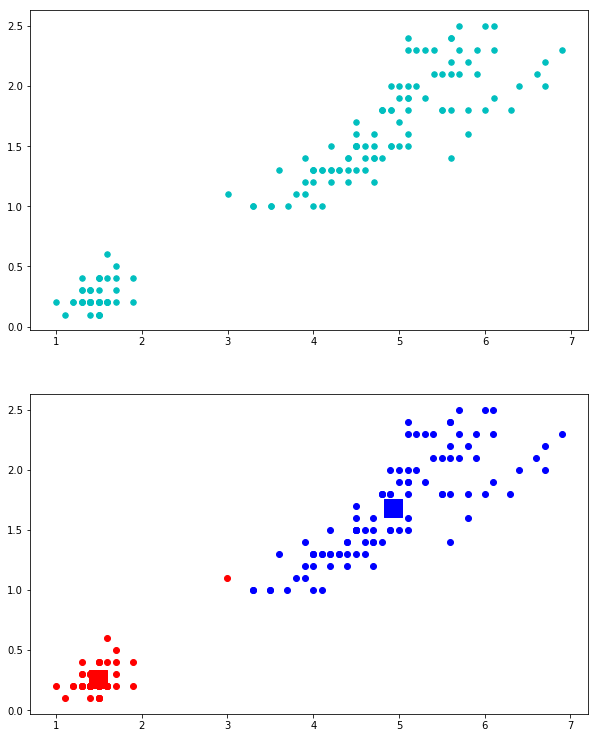

In [7]:
#画出初始化聚类图
f = plt.figure(figsize=(10,20))
ax1 = f.add_subplot(3,1,1)
ax1.scatter(data[:,0],data[:,1],c='c',s=30,marker='o')
ax2 = f.add_subplot(3,1,2)
ax2.scatter(data0[:,0],data0[:,1],c='r')
ax2.scatter(data1[:,0],data1[:,1],c='g')
ax2.scatter(data2[:,0],data2[:,1],c='b')
ax2.scatter(centroids[0,0],centroids[0,1],c='r',s=300,marker='s')
ax2.scatter(centroids[1,0],centroids[1,1],c='g',s=300,marker='s')
ax2.scatter(centroids[2,0],centroids[2,1],c='b',s=300,marker='s')
plt.show()

In [12]:
#统计聚类结果中不同类别花的数量
#在数据data0中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 0)
print (value)
a_list = iris.target[value[0]]
print (len(a_list))
i = 0
se0 = 0
ve0 = 0
vi0 = 0
for i in range(len(a_list)):
    if a_list[i] == 0: se0 += 1
    elif a_list[i] == 1: ve0 += 1
    else: vi0 += 1
    
se_percent = (se0/len(a_list))*100
ve_percent = (ve0/len(a_list))*100
vi_percent = (vi0/len(a_list))*100
print (se_percent,ve_percent,vi_percent)

(array([ 77,  83, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149]),)
48
0.0 4.166666666666666 95.83333333333334


<function matplotlib.pyplot.show>

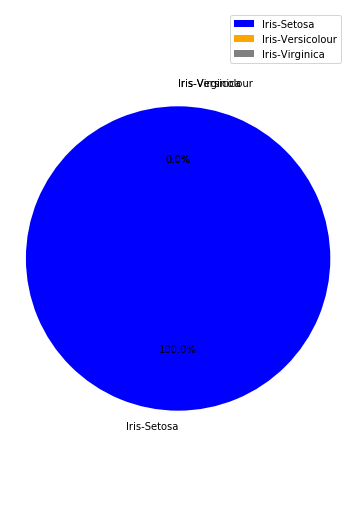

In [9]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show

In [10]:
#统计聚类结果中不同类别花的数量
#在数据data1中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 1)
b_list = iris.target[value[0]]
print(len(b_list))
i = 0
se1 = 0
ve1 = 0
vi1 = 0
for i in range(len(b_list)):
    if b_list[i] == 0: se1 += 1
    elif b_list[i] == 1: ve1 += 1
    else: vi1 += 1
    
se_percent = (se1/len(b_list))*100
ve_percent = (ve1/len(b_list))*100
vi_percent = (vi1/len(b_list))*100
print (se_percent,ve_percent,vi_percent)

48
0.0 4.166666666666666 95.83333333333334


<function matplotlib.pyplot.show>

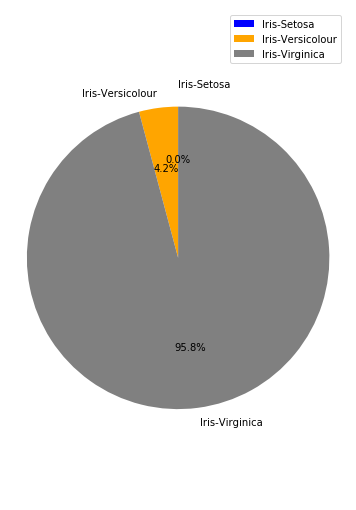

In [11]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show

In [12]:
#在数据data0中各种不同类别花数量的比例
fitlabel_all = clusterAssment[:,0]
value = np.nonzero(fitlabel_all == 2)
c_list = iris.target[value[0]]
print(len(c_list))
i = 0
se2 = 0
ve2 = 0
vi2 = 0
for i in range(len(c_list)):
    if c_list[i] == 0: se2 += 1
    elif c_list[i] == 1: ve2 += 1
    else: vi2 += 1
    
se_percent = (se2/len(c_list))*100
ve_percent = (ve2/len(c_list))*100
vi_percent = (vi2/len(c_list))*100
print (se_percent,ve_percent,vi_percent)

52
0.0 92.3076923076923 7.6923076923076925


<function matplotlib.pyplot.show>

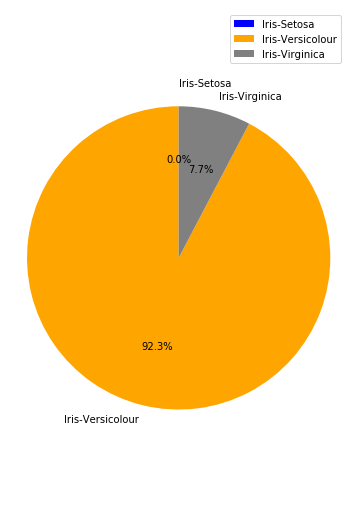

In [13]:
plt.figure(figsize=(6,9))
labels = [u'Iris-Setosa',u'Iris-Versicolour',u'Iris-Virginica']
#Iris-Setosa 山鸢尾
#Iris-Versicolour 杂色鸢尾
#Iris-Virginica 维吉尼亚鸢尾
sizes = [se_percent,ve_percent,vi_percent]
colors = ['blue','orange','gray']
explode = (0.05,0,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,
                                labeldistance = 1.1,autopct = '%3.1f%%',shadow = False,
                                startangle = 90,pctdistance = 0.6)
plt.axis('equal')
plt.legend()
plt.show